In [1]:
# https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

# imports
# import sounddevice as sd # !pip install sounddevice

from scipy.io.wavfile import write
import scipy.io.wavfile
import numpy as np
from scipy.signal import resample
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [2]:
# Variables
fs = 8000  # Sample rate
filename = 'a.wav'

In [3]:
# Lectura del archivo
# For this post we’ll assume our audio has a single channel so that pcm_data is simply an array containing the amplitude of each samples
sample_rate, pcm_data = scipy.io.wavfile.read(filename)

# Se pasa las amplitudes a numpy
amplitudes = np.array(pcm_data)

# normalize
amplitudes_norm = 0.9*amplitudes/max(abs(amplitudes)); 

amplitudes_norm.shape, sample_rate

((32000,), 8000)

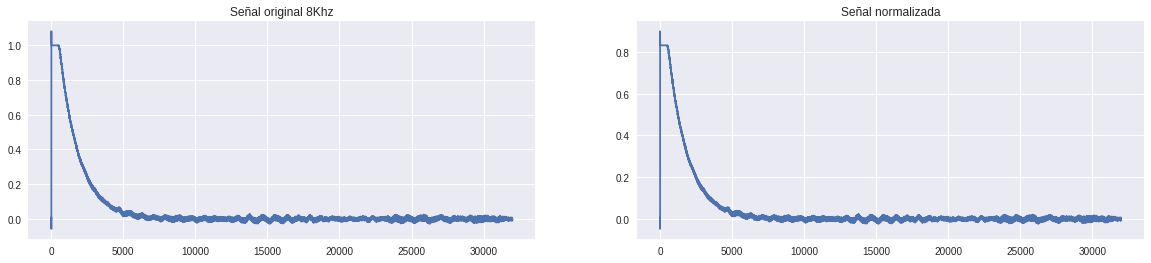

In [4]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.plot(amplitudes)
plt.title("Señal original 8Khz")

plt.subplot(1, 2, 2)
plt.plot(amplitudes_norm)
plt.title("Señal normalizada");

In [5]:
def create_overlapping_blocks(x, w, R = 0.5):
    n = len(x)
    nw = len(w)
    step = floor(nw * (1 - R))
    nb = floor((n - nw) / step) + 1

    B = np.zeros((nb, nw))

    for i in range(nb):
        offset = i * step
        B[i, :] = w * x[offset : nw + offset]

    return B